In [1]:
# BROADCAST VARIABLES ARE USED IN PROCESSES TO ACCESS SHARED DATA 
# ACCUMULATORS ALLOW MULTIPLE PROCESSES TO UPDATED SHARED VARIABLES
# SPARK CONTEXT (SC)
# SPARK SESSION COMPRISES OF SPARK CONTEXT (SC) AND HIVE CONTEXT (HC)

In [2]:
from pyspark.sql import SparkSession

In [3]:
# WE CAN GET (IF IT ALREADY EXISTS) OR CREATE A SparkSession AS SUCH
spark = SparkSession.builder\
                    .appName("Analyzing London crime data")\
                    .getOrCreate()

In [7]:
# WE DESIGNATED THAT THE DATA IS IN A csv FORMAT, AND DESIGNATE header SO 
data = spark.read\
            .format("csv")\
            .option("header", "true")\
            .load("../datasets/london_crime_by_lsoa.csv")

In [8]:
# ALLOWS US TO SEE THE SCHEMA OF THE DATA THAT WE JUST READ IN
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [9]:
data.count()

13490604

In [10]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [11]:
# JUST LIKE PANDAS DROPS ROWS W/NA
data.dropna()

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [12]:
# TRIM DATA BY DROPPING COLUMNS WHICH ARE NOT USEFUL FOR ANALYSIS
data = data.drop('lsoa_code')

data.show(5)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [13]:
# YOU CAN SEE UNIQUE VALUES W/IN A COLUMN BY UTILIZING THE .distinct OPERATION
total_boroughs = data.select('borough')\
                     .distinct()
total_boroughs.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [14]:
total_boroughs.count()

33

In [17]:
# YOU CAN FILETER OUT RECORDS OF A SPECIFIC VALUE 
hackney_data = data.filter(data['borough'] == 'Hackney')

hackney_data.show(5)

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
+-------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [18]:
# HERE WE FILTER THE RECORDS USING .isin FUNCTION TO SPECIFY YEARS
# .sample FUNCTION ALLOWS YOU TO SEE A CERTAIN FRACTION OF YOUR DATA SET
data_2015_2016 = data.filter(data['year'].isin(['2015','2016']))
data_2015_2016.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|          Hillingdon|  Theft and Handling|Theft/Taking Of M...|    0|2016|    2|
|           Southwark|  Theft and Handling|    Theft From Shops|    4|2016|    8|
|             Croydon|             Robbery|   Personal Property|    0|2016|    1|
|      Waltham Forest|Violence Against ...|      Other violence|    0|2016|    9|
|Kensington and Ch...|             Robbery|   Personal Property|    1|2015|    7|
|      Waltham Forest|            Burglary|Burglary in Other...|    0|2015|    6|
|              Bexley|Violence Against ...| Assault with Injury|    0|2015|    6|
|         Westminster|  Theft and Handling|Theft From Motor ...|    6|2016|    8|
|               Brent|  Theft and Handling|Theft/Taking of P...|    0|2015|    1|
|              B

In [20]:
# WE CAN USE OTHER VARIABLE MANIPULATIONS TO EXTRACT CERTAIN DATA
data_2014_onwards = data.filter(data['year']>= 2014 )
data_2014_onwards.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|             Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|            Havering|    Fraud or Forgery|  Counted per Victim|    0|2015|   11|
|           Southwark|  Theft and Handling|    Theft From Shops|    4|2016|    8|
|              Newham|     Criminal Damage|Criminal Damage T...|    0|2015|    1|
|             Hackney|             Robbery|   Business Property|    0|2016|    7|
|            Havering|            Burglary|Burglary in a Dwe...|    1|2016|    8|
|             Croydon|Violence Against ...|      Common Assault|    1|2014|   11|
|             Bromley|     Criminal Damage|Criminal Damage T...|    0|2014|    6|
|           Isli

In [21]:
#PERFORM AGGREGATIONS ON DFs
# .groupBY IS SIMILAR TO SQL
borough_crime_count = data.groupBy('borough')\
                          .count()

borough_crime_count.show(5)

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
+--------------------+------+
only showing top 5 rows



In [22]:
# SUM IS A BUILT IN AGGREGATION IN SPARK DFs, WE UTILIZE BY INVOKING THE .agg METHOD
borough_conviction_sum = data.groupBy('borough')\
                             .agg({'value' : 'sum'})

borough_conviction_sum.show(5)

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
+--------------------+----------+
only showing top 5 rows



In [24]:
borough_conviction_sum = data.groupBy('borough')\
                             .agg({'value' : 'sum'})\
                             .withColumnRenamed("sum(value)", "convictions")

borough_conviction_sum.show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
+--------------------+-----------+
only showing top 5 rows



In [27]:
# WE UTILIZE THE SUM FUNCTION W/OUT GROUPBY 
total_borough_convictions = borough_conviction_sum.agg({"convictions" : "sum"})

total_borough_convictions.show()

+----------------+
|sum(convictions)|
+----------------+
|       6447758.0|
+----------------+



In [28]:
total_convictions = total_borough_convictions.collect()[0][0]

In [29]:
import pyspark.sql.functions as func

In [31]:
# ADDED A NEW COLUMN % contribution
# ROUNDS RESULTS TO 2 DECIMAL PLACES, UTILIZING .round METHOD, THEN PUTTING A 2 @ THE END OF THE FUNCTION
borough_percentage_contribution = borough_conviction_sum.withColumn(
    "% contribution",
    func.round(borough_conviction_sum.convictions / total_convictions * 100, 2))

borough_percentage_contribution.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- % contribution: double (nullable = true)



In [32]:
# ORDER BY THE 3RD COLUMN @ INDEX [2] IN DESCENDING MANNER
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc())\
                               .show(10)

+-------------+-----------+--------------+
|      borough|convictions|% contribution|
+-------------+-----------+--------------+
|  Westminster|   455028.0|          7.06|
|      Lambeth|   292178.0|          4.53|
|    Southwark|   278809.0|          4.32|
|       Camden|   275147.0|          4.27|
|       Newham|   262024.0|          4.06|
|      Croydon|   260294.0|          4.04|
|       Ealing|   251562.0|           3.9|
|    Islington|   230286.0|          3.57|
|Tower Hamlets|   228613.0|          3.55|
|        Brent|   227551.0|          3.53|
+-------------+-----------+--------------+
only showing top 10 rows



In [34]:
# 1ST: FILTER RECORDS FOR 2014
# 2ND: GROUPBY month
# 3rd: FIND THE SUM OF THE VALUES USING AGG FUNCTION
# 4TH: RENAME THE SUM OF VALUES TO CONVICTIONS
conviction_monthly = data.filter(data['year'] == 2014)\
                         .groupBy('month')\
                         .agg({'value' : 'sum'})\
                         .withColumnRenamed('sum(value)','convictions')

In [37]:
total_conviction_monthly = conviction_monthly.agg({'convictions' : 'sum'})\
                                              .collect()[0][0]
                                                    
total_conviction_monthly = conviction_monthly.withColumn(
                 'percent',
                 func.round(conviction_monthly.convictions/total_conviction_monthly * 100, 2))
                                                    
total_conviction_monthly.columns                                                 

['month', 'convictions', 'percent']

In [38]:
# RESULTS SHOW THERE IS NOT MUCH VARIATION FROM ONE MONTH TO ANOTHER
total_conviction_monthly.orderBy(total_conviction_monthly.percent.desc()).show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|   10|    60537.0|    8.9|
|   11|    59704.0|   8.78|
|    7|    58564.0|   8.61|
|    3|    57669.0|   8.48|
|   12|    57565.0|   8.46|
|    6|    57039.0|   8.39|
|    9|    56933.0|   8.37|
|    5|    56327.0|   8.28|
|    8|    55641.0|   8.18|
|    1|    55515.0|   8.16|
|    4|    53467.0|   7.86|
|    2|    51222.0|   7.53|
+-----+-----------+-------+



In [39]:
crimes_category = data.groupBy('major_category')\
                      .agg({'value' : 'sum'})\
                      .withColumnRenamed('sum(value)', 'convictions')

In [40]:
crimes_category.orderBy(crimes_category.convictions.desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|  2661861.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|     Criminal Damage|   630938.0|
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|Other Notifiable ...|   106349.0|
|    Fraud or Forgery|     5325.0|
|     Sexual Offences|     1273.0|
+--------------------+-----------+



In [41]:
year_df = data.select('year')

In [43]:
# MIN & MAX AGGREGATES ON SPARK
year_df.agg({'year' : 'min'}).show() 

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [44]:
year_df.agg({'year' : 'max'}).show() 

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [45]:
year_df.describe().show()

+-------+-----------------+
|summary|             year|
+-------+-----------------+
|  count|         13490604|
|   mean|           2012.0|
| stddev|2.581988993167432|
|    min|             2008|
|    max|             2016|
+-------+-----------------+



In [46]:
# IF YOU WANT VIEW INFORMATION IN MATRIX FORM, DF SUPPORT A CROSSTAB FUNCTION
# WE ARE DISPLAYING THE BOROUGHS FOR 4 MAJOR CATEGORIES OF CRIMES
data.crosstab('borough', 'major_category')\
    .select('borough_major_category', 'Burglary', 'Drugs', 'Fraud or Forgery', 'Robbery')\
    .show()

+----------------------+--------+-----+----------------+-------+
|borough_major_category|Burglary|Drugs|Fraud or Forgery|Robbery|
+----------------------+--------+-----+----------------+-------+
|              Havering|   32400|32616|            5508|  27648|
|                Merton|   26784|29160|            5724|  23652|
|              Haringey|   31320|35424|           10368|  29484|
|         Tower Hamlets|   31104|37368|            5400|  28512|
|               Bromley|   42552|42336|            8532|  34668|
|               Enfield|   39528|44064|            9720|  35532|
|  Kingston upon Thames|   21168|22140|            3780|  15660|
|           Westminster|   27648|32616|            8748|  25056|
|  Richmond upon Thames|   24840|23004|            2808|  18468|
|              Lewisham|   36504|43740|           11016|  34884|
|                 Brent|   37368|46980|            9288|  34128|
|  Barking and Dagenham|   23760|26244|            7236|  22248|
|             Redbridge| 

In [47]:
# MATPLOLIB INLINE COMMAND ALLOWS YOU TO DISPLAY GRAPHS INLINE IN THE NB
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [49]:
# HELPER FUNCTION: PLOT NUMBER OF CONVICTIONS ACROSS BOROUGHS FOR A PARTICULAR YEAR
# WE FILTER THE DATA SET BY YEAR, GROUP BY BOROUGH, AND PERFORM SUM AGGREGATION, AND RENAME THE RESULTANT CONVICTIONS
# GET THE BOROUGH LIST AND THE TOTAL CONVICTIONS LIST BY ITERATING OVER THE BOROUGHS AND TOTAL CONVICTIONS BY COLUMNS
# WE DO THIS MY USING THE .toLocalIterator FUNCTION THAT IS AVAILABLE ON DFs
# THE CODE IS TO PLOT A BAR CHART ON MATPLOTLIB
# X AXIS IS TH BOROUGHS, Y AXIS CONVICTIONS
def describe_year(year):
    yearly_details = data.filter(data.year == year)\
                         .groupBy('borough')\
                         .agg({'value' : 'sum'})\
                         .withColumnRenamed('sum(value)', 'convictions')
    
    borough_list = [x[0] for x in yearly_details.toLocalIterator()]
    convictions_list = [x[1] for x in yearly_details.toLocalIterator()]
    
    plt.figure(figsize=(33,10))
    plt.bar(borough_list, convictions_list)
    
    plt.title('Crime for the year: ' + year, fontsize=30)
    plt.xlabel('Boroughs', fontsize=30)
    plt.ylabel('Convictions', fontsize=30)
    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()

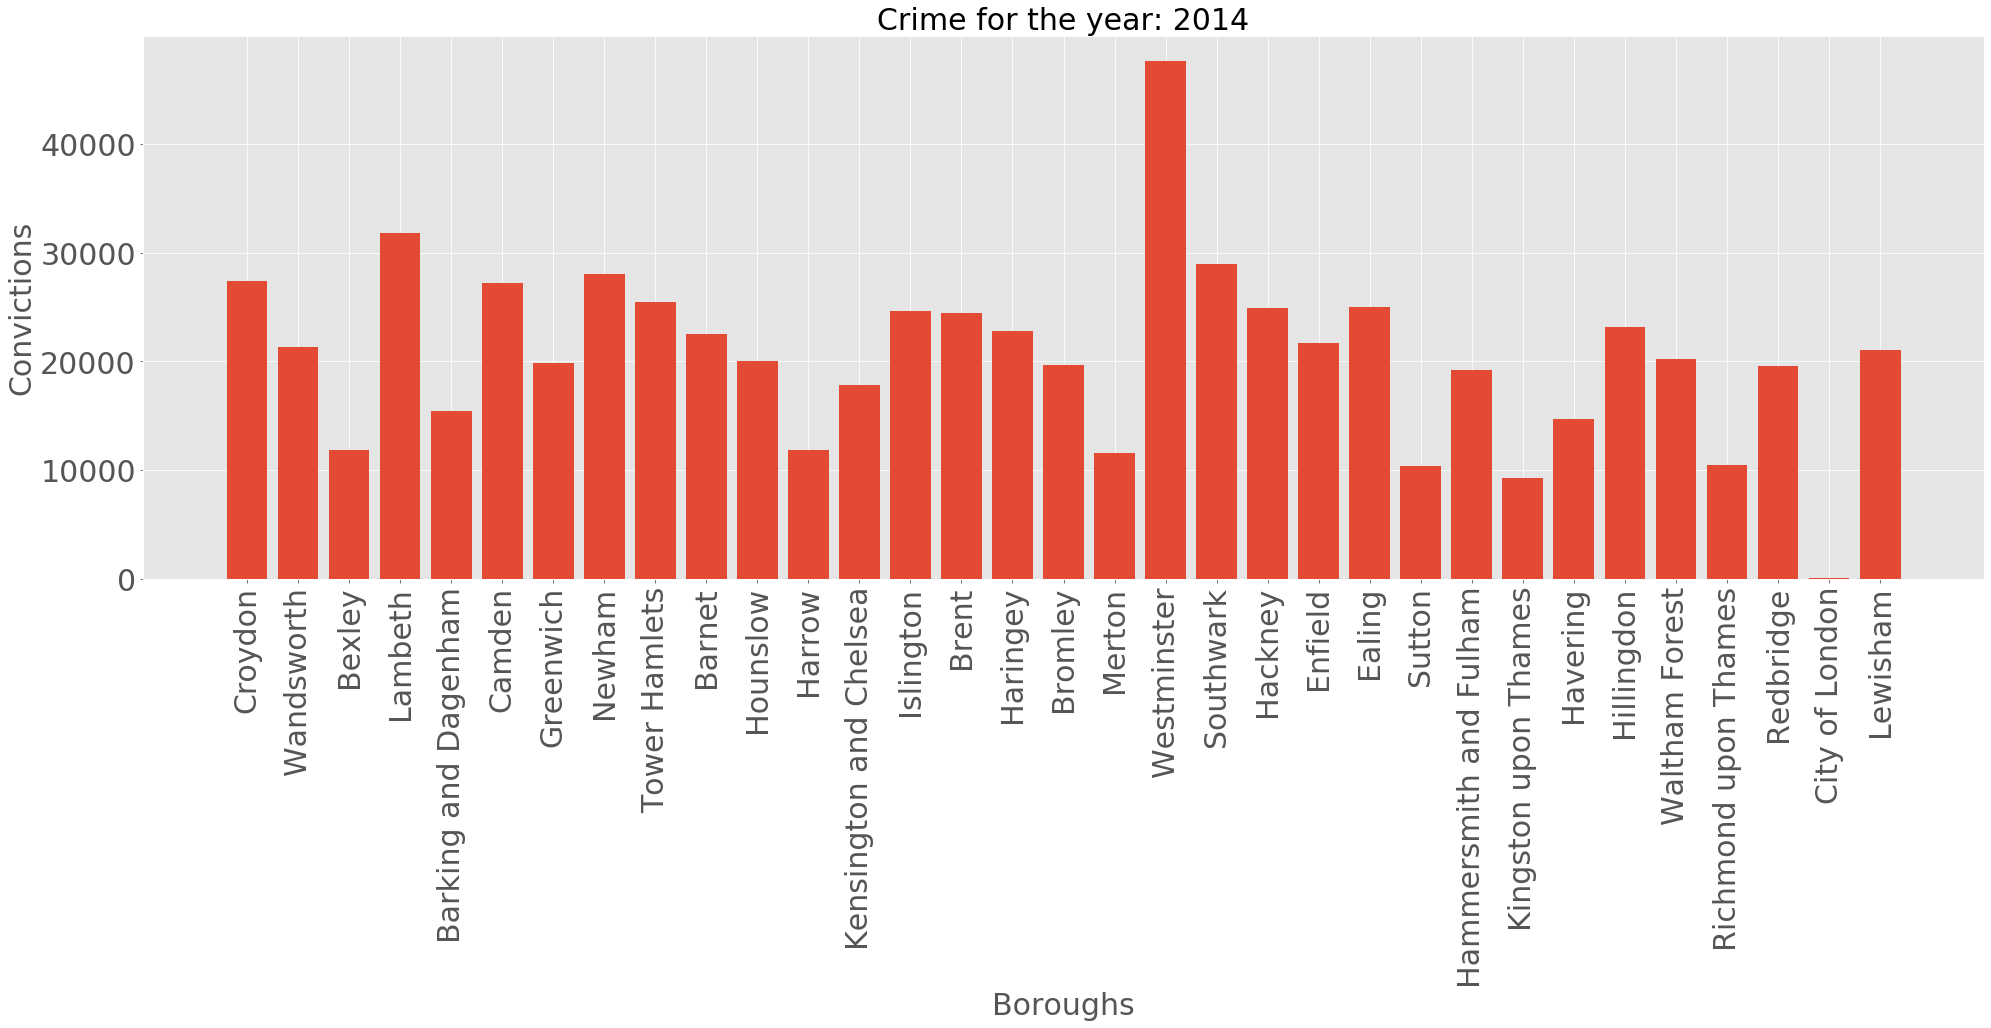

In [51]:
# SHOWS THAT WESTMINSTER IS AN OUTLIER IN THE CONVICTION RATES
describe_year('2014')

ACCUMULATORS AND BROADCAST VARIABLES 
- DIFFERENT PROCESSES CAN SHARE VARIABLES
- SPARK IS WRITTEN IN SCALA, AND HEAVILY UTILIZES CLOSURE
- CLOSURES TREAT FUNCTIONS AS FIRST CLASS CITIZENS:
    - FUNCTIONS CAN BE STORED IN A VARIABLE OR VALUE
    - THE RETURN VALUE OF A FUNCTION CAN BE A FUNCTION
    - A PARAMETER OF A FUNCTION CAN BE A FUNCTION
    
CLOSURES: NESTED FUNCTION THAT IS RETURNED FROM THE OUTER SCOPE AND CAN ACCESS THE LOCAL VARIABLES IN THE OUTER SCOPE
- CLOSURE RETAINS ITS COPIES OF LOCAL VARIABLES, EVEN AFTER THE OUTER SCOPE CEASES TO EXIST

- OUTER SCOPE
    - LOCAL VARIABLES
    - NESTED FUNCTION: CAN ACCESS LOCAL VARIABLES FROM OUTER SCOPE, NESTED FUNCTION IS RETURNED 
        - RETURNED TO CALLING FUNCTION


In [ ]:
# MAP OPERATION DEFINES A FUNCTION THAT HAS TO APPLY TO EVERY ELEMENT IN THAT RDD


# SPARK SCRIPT THAT APPLIES A MAP OPERATION TO AN RDD 
"""MyScript.py"""



if __name__ == "__main__":
    delim = " "
# START BY DEFINING A DELIMETER IN THE OUTER SCOPE (DELIMETER HERE IS THE " " WHITESPACE)
    #VARIABLE WILL BECOPIED TO EACH TASK ON WHICH MAP FUNCTION RUNS 
# DEFINE A NESTED FUNCTION, THIS NESTED FUNCTION IS A CLOSURE
    def myFunc(s):
        words = s.split(delim)
# REFERENCE THAT VARIABLE 
        return len(words)

# THIS COPYING IS DONE FROM MASTER ALONE 
    sc = SparkContext(...)
# NESTED FUNCTION USED ON A MAP OPERATION ON AN RDD (WE GET THIS RDD BY READING IN A TEXT FILE)
    sc.textFile("file.txt').map(myFunc)

BROADCAST VARIABLES:
- ONLY 1 READ-ONLY COPY PER NODE (NOT 1 COPY PER TASK), NO SHUFFLING
- USE WHENEVER TASKS ACROSS STAGES NEED SAME DATA 
- SHARE DATASET W/ALL NODES
    - TRAINING DATA IN ML
    - STATIC LOOKUP TABLES
ACCUMULATORS: 
- BROADCAST TO WORKERS BUT CAN BE MODIFIED BY ADDING TO IT
- READ-WRITE SHARED VARIABLES
- ADDED ASSOCIATIVELY AND COMMUTATIVELY
- COMMUTATIVITY: A + B = B + A
- ASSOCIATIVITY: A + (B+C) = (A+B) + C
SHUFFLING: INVOLVES THE SPLITTING UP OF DATA TO BE SENT TO MULTIPLE NODES WHERE PROCESSING OCCURS 

ACCUMULATOR VARIABLES: 
- Long 
- Double
- Collections

- use accumulator variables when you want a global counter or global sum
- workers can only modify state
- only 

Can extend by subclassing AccumulatorV2

